# BEE 4750 Lab 1 Solution

> **Due Date**
>
> Friday, 9/1/23, 9:00pm

These solutions are not unique; other approaches are possible. But
they’re how I would solve the problems and might be helpful for Julia
syntax.

In [1]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

In [2]:
using Plots

## Exercises (10 points)

### Exercise 1 (3 points)

Given two numeric arrays `x` and `y`, write a function to compute their
dot product if they have equal length, and return an error if not (this
is useful for debugging!). Use the following code as a starting point.

In [3]:
function dot_product(x, y)
    if length(x) == length(y)
        return sum(x .* y) # use broadcasting to elementwise multiply
    else
        throw(DimensionMismatch("length of x not equal to length of y"))
    end
end

dot_product (generic function with 1 method)

Here are some tests to make sure your code works as intended. Tests like
these are useful to make sure everything works as intended. One reason
to split your code up into functions is that it makes it straightforward
to write tests to make sure each piece of your code works, which makes
it easier to identify where errors are occuring.

In [4]:
dot_product([1 2 3], [4 5 6])

32

If you know the value you should get, you can write a more formal test
using the `@assert` macro, which is a good way to “automate” checking
(since you get an obvious error if the code doesn’t work as desired):

In [5]:
@assert dot_product([1 2 3], [4 5 6]) == 32

Let’s also make sure we get an error when the dimensions of the two
vectors don’t match:

In [6]:
dot_product([1 2 3], [4 5])

### Exercise 2 (3 points)

This problem involves implementing Newton’s method for computing square
roots; it was shamelessly copied from MIT’s [Introduction to
Computational
Thinking](https://computationalthinking.mit.edu/Spring21/hw0/). You will
use a `while` loop instead of the `for` loop shown above.

Implement the following algorithm in a function `newton_sqrt`:

Given $x > 0$:

1.  Take a guess $a$.
2.  Divide $x$ by $a$.  
3.  Update $a$ as the average of $x/a$ and $a$.
4.  Repeat until $x/a$ is within a tolerance of $\varepsilon$ from $a$.
5.  Return $a \approx \sqrt{x}$.

In [7]:
# Write a function for Newton's method
# x is the value we want to find the root of
# a is the initial guess
# ϵ is the tolerance
function newton_sqrt(x, a, ϵ)
    while abs(x/a - a) >= ϵ # loop until x/a is within tolerance
        a = ((x/a) + a) / 2
    end
    return a
end

newton_sqrt (generic function with 1 method)

Use your `newton_sqrt` function to compute $\sqrt{2}$ to within a
tolerance of $\varepsilon = 0.01$.

In [8]:
newton_sqrt(2, 1, 0.01)

1.4166666666666665

### Exercise 3: Making a Plot (3 points)

Write a function to compute the square of an integer `x`. Evaluate this
function for integers between $x=-5$ and $x=5$ and make a plot of the
squared values (you can find a quick guide to making various types of
plots [here](../tutorials/julia-plots.html)). Make sure to label your
axes.


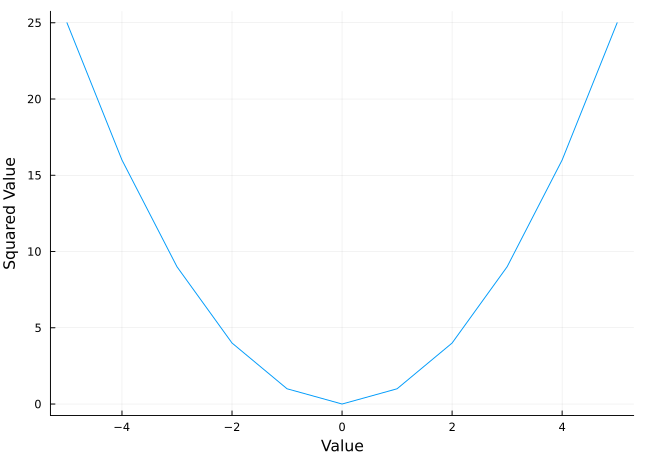

In [9]:
# Write square function
# x is the integer which will be squared
square_int(x) = x * x

# Evaluate from x=-5 to x=5
x = -5:1:5 # this creates an array of integers between -5 and 5
y = square_int.(x)

# Plot integer values without a legend
plot(x, y, label=:false)
xlabel!("Value") # add x label; this could be done within the plot call
ylabel!("Squared Value") # add y label

## Export and Submit the Notebook (1 point)

The last step is to export the notebook for submission to Gradescope
(this section won’t be repeated going forward, but the steps are the
same).

You should see the following menu bar at the top of the VS Code window:
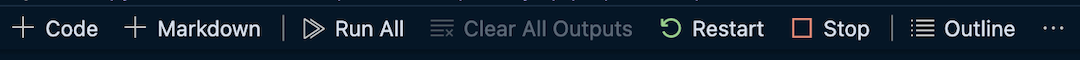

1.  Click “Run All” at the top to execute all of the cells in order.
    **Please do not forget to do this before exporting and submitting or
    you may lose points because your code has not been executed or may
    have errors**.
2.  Click the ellipsis (“…”) and select “Export”. If you have LaTeX
    installed, you can click “PDF”; otherwise, click “HTML.” Save the
    file, and then when prompted, open the file. This should open the
    page in your browser; go to the print interface and save as a PDF.
    ::: {.callout-tip} When printing to PDF, long lines will run off the
    edge of code cells, which may result in comments or code being
    hidden. If you see this, go back to the notebook and break up long
    lines into shorter onces (for example, see the comment in the above
    code cell) to ensure key parts of your results aren’t missing. :::

Great! That’s the basic workflow for every assignment in this course.

Now you have your PDF that you can submit to Gradescope. Make sure that
you tag pages corresponding to relevant problems to avoid a 10% penalty.